First few rows of the dataset:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  

Missing values in each column:
Survived                   0
P

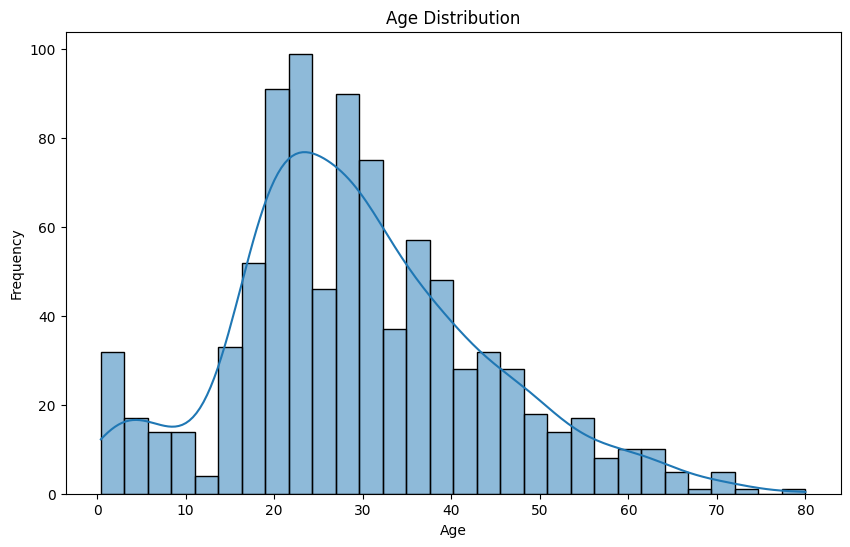

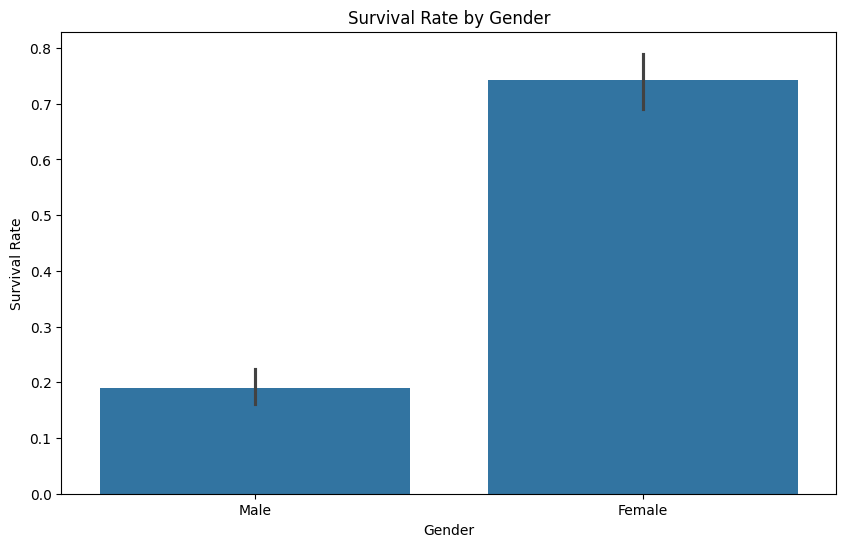

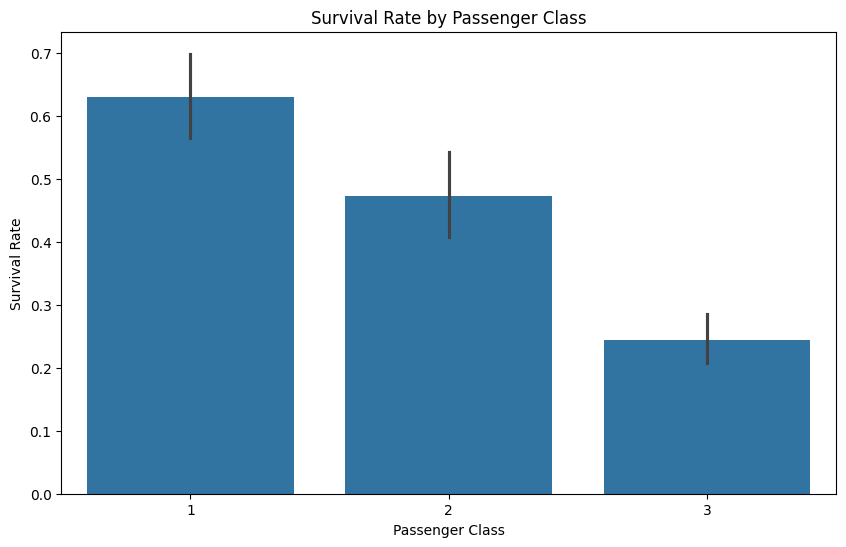

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Data Cleaning
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values: fill 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop columns if they exist
columns_to_drop = ['Cabin', 'Name']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Convert categorical variables to numerical values
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Display the cleaned data info
print("\nInfo of cleaned data:")
print(df.info())

# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Visualizations
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Pairplot to explore relationships
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']])
plt.show()
